# Physician dataset EDA

In this notebook, I am exploring and cleaning the dataset of physician which included all details of 
physician, their city and state as well as yearly payment information for each physician.
From all this information, I will extract some important information only which will help me to find the 
fraud activities.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./datasets/OP_DTL_GNRL_PGYR2017_P06302020.csv")

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,7,9,11,14,16,17,21,22,23,24,35,36,37,40,41,42,43,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,1300911.0,MARION,NaN,ANTHONY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/30/2020
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,113198.0,ELISABETH,NaN,ANTON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/30/2020
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,924405.0,PETER,H,AHN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/30/2020
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,924405.0,PETER,H,AHN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/30/2020
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,780716.0,DAVID,B,MANSUR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,06/30/2020


From all columns I am just concern about the Name, City, State and their total amount of payment in 2017.


In [4]:
df=df[['Physician_First_Name','Physician_Last_Name', 'Recipient_City', 
                                             'Recipient_State', 
                                             'Total_Amount_of_Payment_USDollars',"Recipient_Zip_Code"]]
                                             

In [5]:
df.shape

(11395407, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11395407 entries, 0 to 11395406
Data columns (total 6 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Physician_First_Name               object 
 1   Physician_Last_Name                object 
 2   Recipient_City                     object 
 3   Recipient_State                    object 
 4   Total_Amount_of_Payment_USDollars  float64
 5   Recipient_Zip_Code                 object 
dtypes: float64(1), object(5)
memory usage: 521.6+ MB


Renaming the column names

In [7]:
# to make it easy and for joining with other dataset I changed the column name

df=df.rename(columns={'Physician_First_Name':'first_name', 'Physician_Last_Name':'last_name',
                      'Recipient_City':'city','Recipient_State':'state',
                      'Total_Amount_of_Payment_USDollars':'Total_Payment_Sum',
                     "Recipient_Zip_Code":'ZIP'})

In [8]:
df.head()

,first_name,last_name,city,state,Total_Payment_Sum,ZIP
0,MARION,ANTHONY,PLEASANTON,CA,14.32,94588
1,ELISABETH,ANTON,BELLEVUE,WA,10.61,98004
2,PETER,AHN,PHILADELPHIA,PA,80.32,19104-4206
3,PETER,AHN,PHILADELPHIA,PA,100.00,19104-4206
4,DAVID,MANSUR,CLEVELAND,OH,31.50,44106-1716


# EDA

Cleaning up the rows to make is similar with other datasets

In [9]:
# Removing the punctuation from the first name

df["first_name"]=df["first_name"].str.replace('[^\w\s]','')

In [10]:
# Making the first name upper case

df["first_name"]=df["first_name"].str.upper()

In [11]:
# Making the last name upper case

df["last_name"]=df["last_name"].str.upper()

In [12]:
df["first_name"].nunique()

54506

In [13]:
df["last_name"].nunique()

174529

In [14]:
df["Name"]=df["first_name"]+" "+df["last_name"]

In [15]:
df=df.drop(columns=["first_name","last_name"])

In [16]:
df=df[['Name','city', 'state', 'Total_Payment_Sum']]

In [17]:
df.head()

,Name,city,state,Total_Payment_Sum
0,MARION ANTHONY,PLEASANTON,CA,14.32
1,ELISABETH ANTON,BELLEVUE,WA,10.61
2,PETER AHN,PHILADELPHIA,PA,80.32
3,PETER AHN,PHILADELPHIA,PA,100.00
4,DAVID MANSUR,CLEVELAND,OH,31.50


In [18]:
df["Name"].nunique()

546478

In [19]:
df1=df.groupby("Name")["Total_Payment_Sum"].sum().reset_index()

In [20]:
df1

,Name,Total_Payment_Sum
0,01SOHEIR AZER,12.64
1,A AKBAR,366.07
2,A ALBALA,112622.87
3,A ALICEA,362.77
4,A AMINIAN,4690.72
...,...,...
546473,ZYGMUNT ORZECHOWSKI,19.34
546474,ZYLKIA RODRIGUEZ,238.55
546475,ZYNIA PUA-VINES,104.33
546476,ZYNNIA ZAFRA,923.82


In [21]:
df1["Total_Payment_Sum"].describe()

count    5.464780e+05
mean     3.981362e+03
std      7.620387e+04
min      3.000000e-02
25%      5.359000e+01
50%      1.819300e+02
75%      7.412300e+02
max      2.684356e+07
Name: Total_Payment_Sum, dtype: float64

In [22]:
df1.shape

(546478, 2)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546478 entries, 0 to 546477
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               546478 non-null  object 
 1   Total_Payment_Sum  546478 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.3+ MB


Let's explore our dataset

In [24]:
df1.head()

,Name,Total_Payment_Sum
0,01SOHEIR AZER,12.64
1,A AKBAR,366.07
2,A ALBALA,112622.87
3,A ALICEA,362.77
4,A AMINIAN,4690.72


Physician with highest payment

In [25]:
max_payment=df1.sort_values(by="Total_Payment_Sum",ascending=False).head(10)

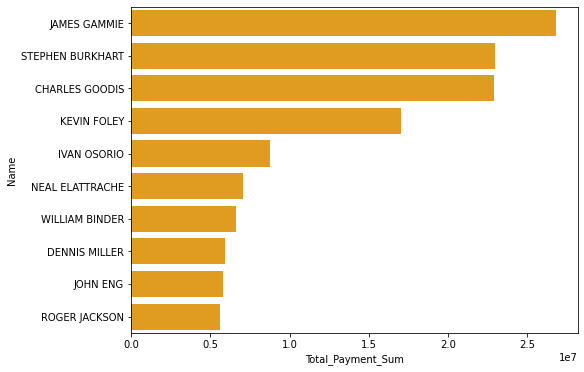

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y="Name", x="Total_Payment_Sum", data=max_payment
              , color="orange", linewidth=0)


Let's check the physician who has reported lowest amount throughout a year

In [27]:
min_payment=df1.sort_values(by="Total_Payment_Sum").head(10)

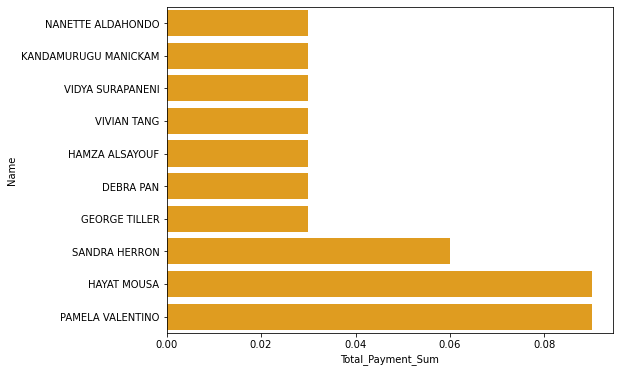

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y="Name", x="Total_Payment_Sum", data=min_payment
              , color="orange", linewidth=0)

Sometime extremely highest earner physician may involved in suspicious activities whereas it is 
a strange that some physician earned very low amount throughout 2017 which is really suspicious.

In [30]:
df1.to_csv("./datasets/payment.csv")